# Final Project - Abalone Age Prediction 

## Intro: Abalone data
source: Machine Learning Resipository, University of California-Irvine (UCI)
* A biological study for Department of Primary Industry and Fisheries, Tasmania, Australia.
* Abalone, a very common type of shellfish. Their flesh are served as delicacy dishes and their shells are popular in jewellery.
* 4177 observations
* 9 attributes in data:
1. Sex 
2. Length 
3. Diameter
4. Height
5. Whole Weight
6. Shucked Weight
7. Viscera Weight
8. Shell Weight
9. Ring

## URLs for data acquisition
UCI http://mlr.cs.umass.edu/ml/datasets/Abalone

Abalone data http://mlr.cs.umass.edu/ml/machine-learning-databases/abalone/abalone.data

Data description http://mlr.cs.umass.edu/ml/machine-learning-databases/abalone/abalone.names

#### Import data from local file after downloading

In [88]:
#read in data
from pandas import read_csv
data=read_csv('C:/Users/Min-Chin/Downloads/abalone.csv',sep=',')# default 1st row attri names

#### The head, info, and shape of the original abalone data

In [92]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Ring
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex              4177 non-null object
Length           4177 non-null float64
Diameter         4177 non-null float64
Height           4177 non-null float64
WholeWeight      4177 non-null float64
ShuckedWeight    4177 non-null float64
VisceraWeight    4177 non-null float64
ShellWeight      4177 non-null float64
Ring             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [90]:
data.shape

(4177, 9)

#### Find ourlier for linear regression

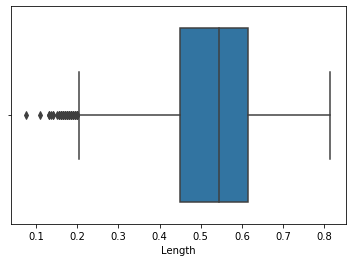

In [35]:
import seaborn as sns
sns.boxplot(x=data['Length'])

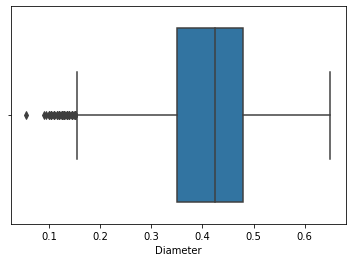

In [36]:
sns.boxplot(x=data['Diameter'])

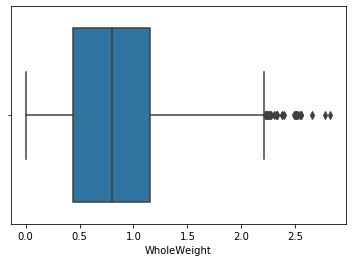

In [38]:
sns.boxplot(x=data['WholeWeight'])

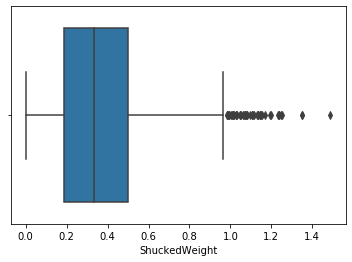

In [39]:
sns.boxplot(x=data['ShuckedWeight'])

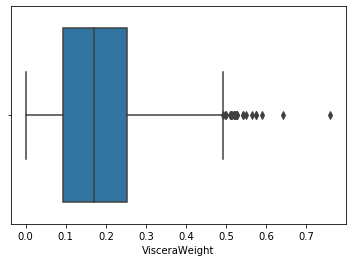

In [40]:
sns.boxplot(x=data['VisceraWeight'])

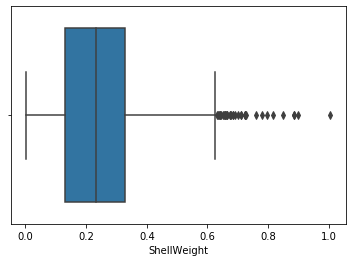

In [41]:
sns.boxplot(x=data['ShellWeight'])

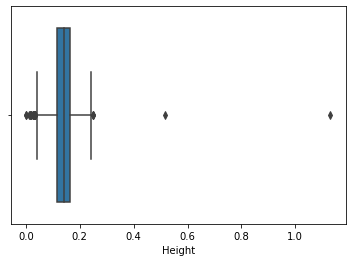

In [37]:
sns.boxplot(x=data['Height'])

In [96]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(data_float))
#z.max() #23
print(np.where(z>8))

(array([1417, 2051], dtype=int64), array([3, 3], dtype=int64))


In [95]:
print(data_float.at[1417,'Height']) 
print(data_float.at[2051,'Height'])
hmean=data_float['Height'].mean()
print(hmean)

0.515
1.13
0.13951639932966242


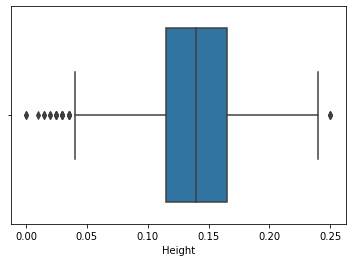

In [97]:
data_float.iloc[1417,3]=hmean
data_float.iloc[2051,3]=hmean
#print(data_float.iloc[2051,3])
sns.boxplot(x=data_float['Height'])

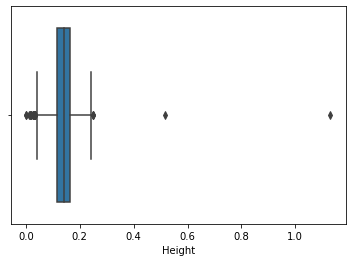

In [98]:
sns.boxplot(x=data['Height'])

## Pre-processing data for ML
  * Data are organized as a table: observations (rows) vs features (columns)
  * Data are of correct type (e.g. categorical vs continuous, boolean vs int)
    - Feature *Sex* is categorical, modified into integer type

In [91]:
data_float=data.replace({'I':0,'M':1,'F':2})
data_float.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Ring
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Pre-processing data for ML

  *  Data from multiple sources are combined
  *  Missing data are handled
     - According to data description, no missing value in data set.

In [3]:
data.isnull().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Ring             0
dtype: int64

## Pre-processing data for ML
  * Features have been combined and manipulated as needed
    - 3 features are combined
    - **length * diameter * height** as abalone **volume** to represent the sellfish size
    - making it more relative to the other 4 abalone-weight-related attributes 

In [82]:
data_float['Volume']=data_float['Length']*data_float['Diameter']*data_float['Height']
data_float.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Ring,Volume
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.015777
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.008347
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.030051
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.020075
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.006732


## Pre-processing data for ML
  * Any data that need to be normalized have been normalized
    - simple standardization-mean 0, variance 1

In [84]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler=StandardScaler()
scaledData=scaler.fit_transform(data_float.loc[:,'WholeWeight':'Volume'])
colname=('WholeWeight','ShuckedWeight','VisceraWeight','ShellWeight','Ring','Volume')
df=pd.DataFrame(scaledData, columns=colname)
df.head()

,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Ring,Volume
0,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,-0.904141
1,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,-1.260242
2,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,-0.219997
3,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,-0.698145
4,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,-1.337672


#### A problem statement: to predict the age of abalone using available attributes
  * dependent variable (y): the age of abalone, **Rings**
  * statistical model: Ranodm Forest

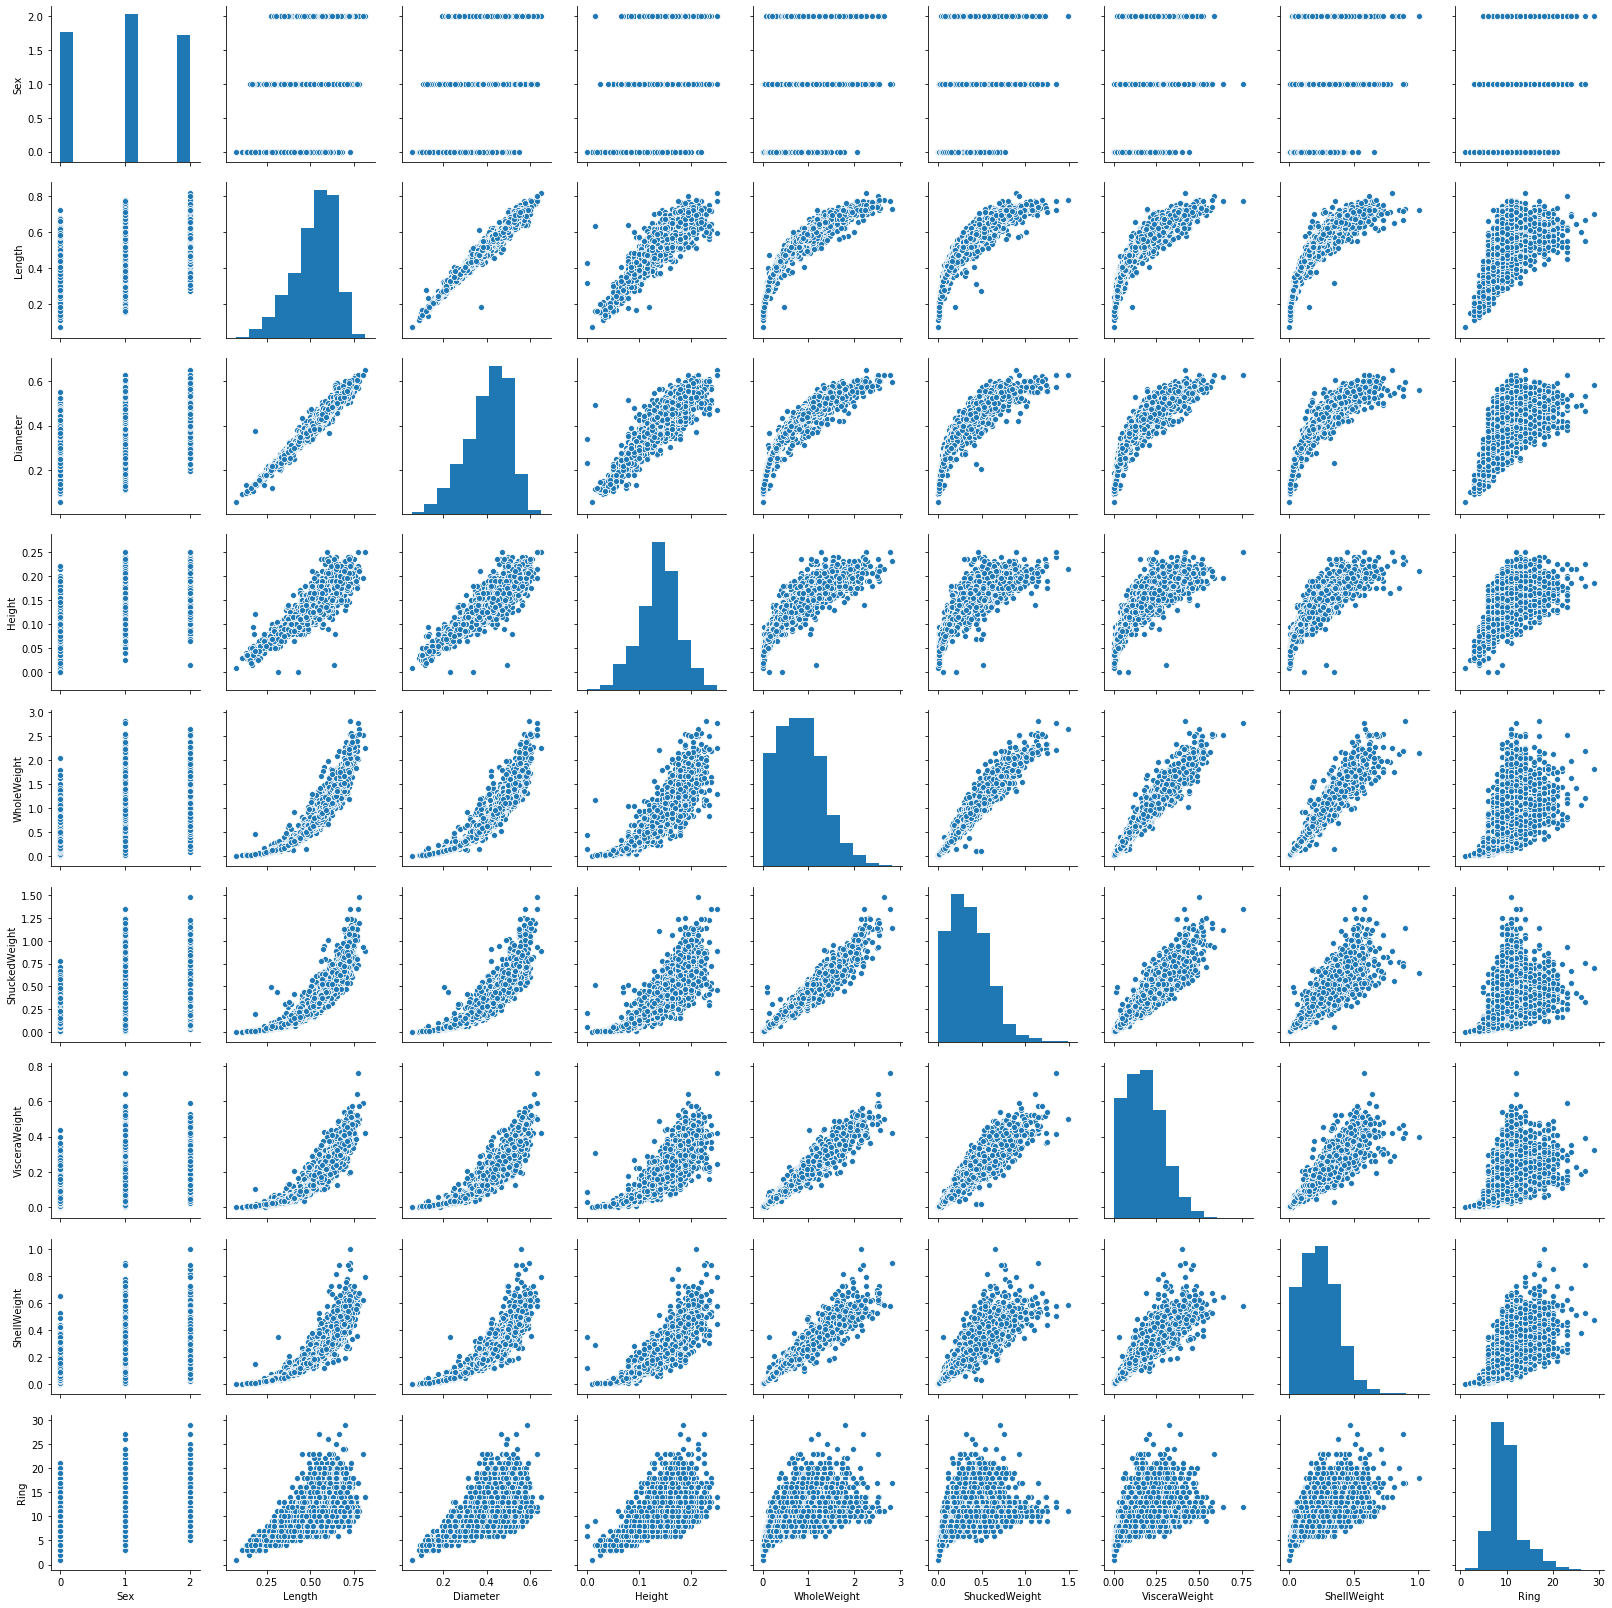

In [99]:
sns.pairplot(data_float)

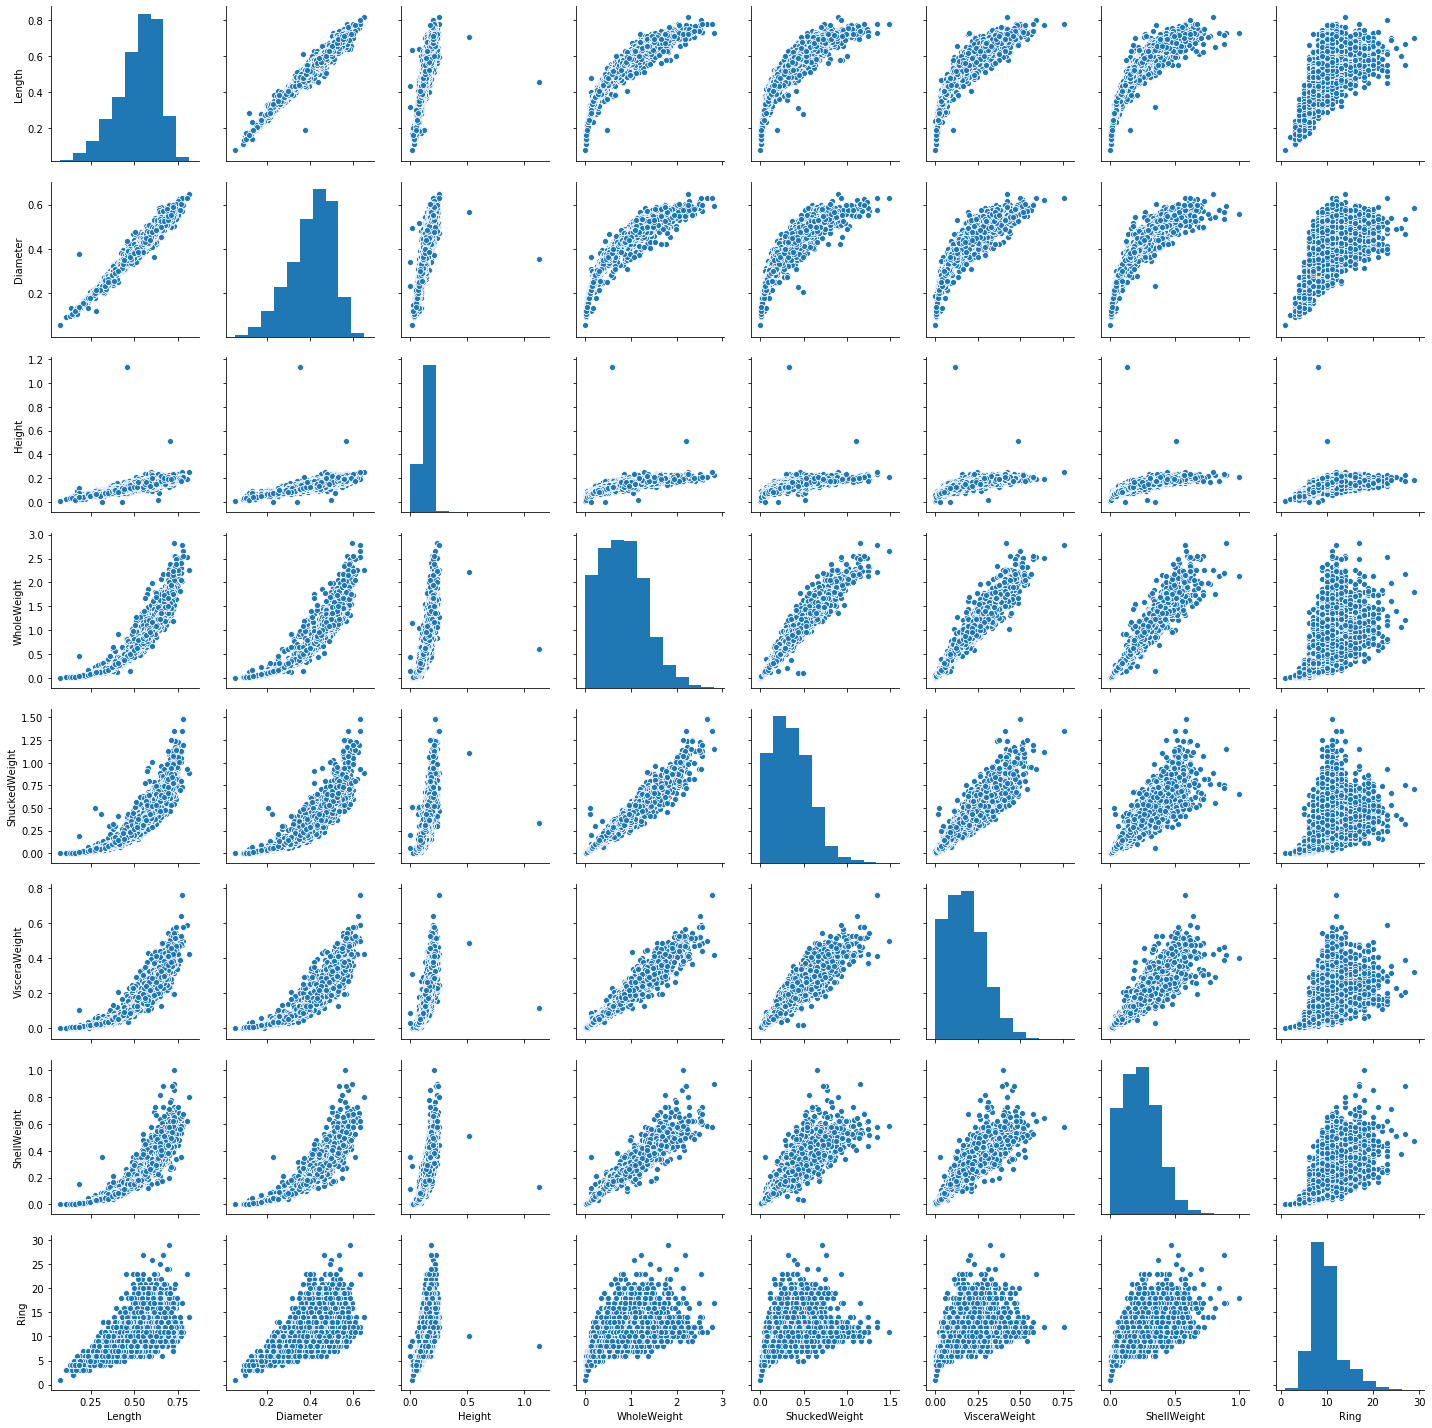

In [101]:
sns.pairplot(data)

In [80]:
from pandas.plotting import scatter_matrix
data_float.corr()
#data_float.Diameter.std()

0.09923986613365945

##### Divide data into predictors and the response

In [104]:
import numpy as np
X=df.iloc[:,[0,1,2,3,5]]
#X.head()
y=df.iloc[:,4]
y.shape

(4177,)

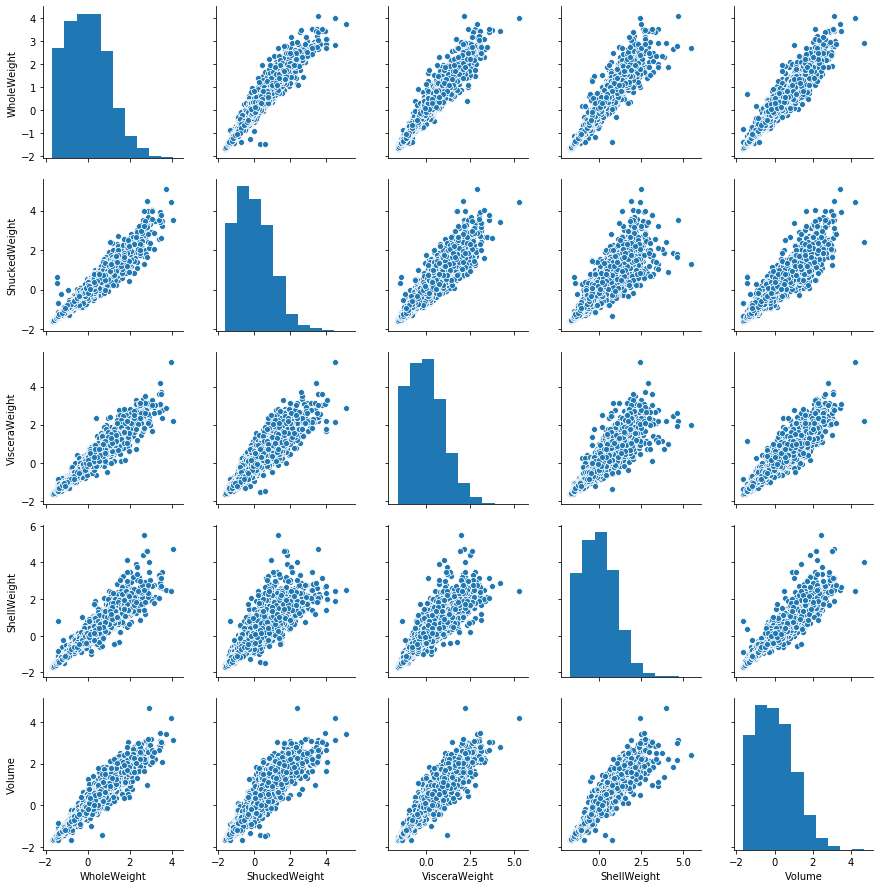

In [105]:
sns.pairplot(X)

##### Train and Test Split

In [11]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
kf=KFold(n_splits=5,shuffle=True,random_state=35)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

Random Forest (Ensemble)
* collection of weak (poor performing) models makes a strong and robust model
* subsampling the features
* shallow trees

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
gscv=GridSearchCV(regressor,{'max_depth':range(0,20),'n_estimators':range(2,20)},cv=kf,n_jobs=-1)

In [18]:
rf=regressor.fit(X_train,y_train)

In [19]:
ypredict=regressor.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ypredict)

0.49367994863197856